<a href="https://colab.research.google.com/github/HarryHoney/BinaryTrees/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Below Code Shows to method to download dataset using Kaggle API and the saving it to drive directing


In [0]:
# !kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets -p /content/drive/My\ Drive/Colab\ Notebooks/Covid19

 87% 73.0M/84.3M [00:01<00:00, 40.7MB/s]
100% 84.3M/84.3M [00:02<00:00, 42.7MB/s]


Here we are extracting the data in drive so that it can be used directly for further uses

In [0]:
#  !unzip '/content/drive/My Drive/Colab Notebooks/Dog Vision/dog-breed-identification.zip' -d '/content/drive/My Drive/Colab Notebooks/Dog Vision'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Dog Vision/train/83fbbcc

In [6]:
import tensorflow as tf
print(tf.__version__)

2.2.0


Tensorflow Hub to use here

In [7]:
import tensorflow_hub as hub
print(hub.__version__)

0.8.0


In [8]:
print('Is GPU present? ','yes' if tf.config.list_physical_devices('GPU') else 'Not available')

Is GPU present?  yes


In [9]:
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Colab Notebooks/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     694e8e593e55be4c673f97fdf70e3580  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


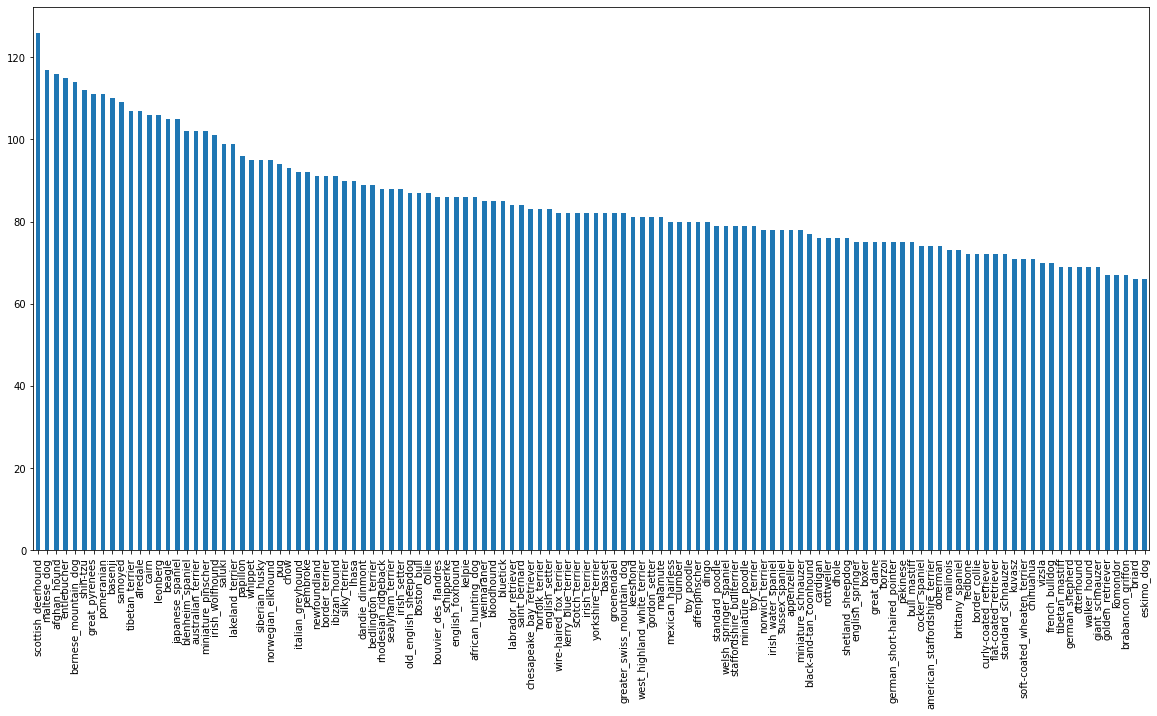

In [10]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [11]:
labels_csv['breed'].value_counts().min()

66

In [12]:
labels_csv['breed'].value_counts().median()

82.0

The below code is am example of how to get image paths from drive

In [0]:
# imageNames = os.listdir('/content/sample_data/xray_dataset_covid19/train/NORMAL/')
# imagePath = []
# for name in imageNames:
#   imagePath.append('/content/sample_data/xray_dataset_covid19/train/NORMAL/'+name)


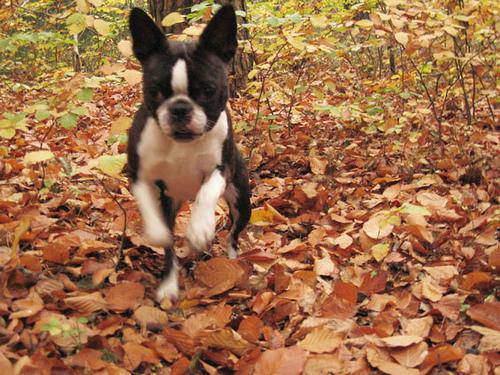

In [14]:
# We can get Image using below lib
from IPython.display import Image
Image('drive/My Drive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [15]:
#creating paths
imagepath = ['drive/My Drive/Colab Notebooks/Dog Vision/train/'+fname+'.jpg' for fname in labels_csv['id']]
len(imagepath)
imagepath[0:10]

['drive/My Drive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Colab Notebooks/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

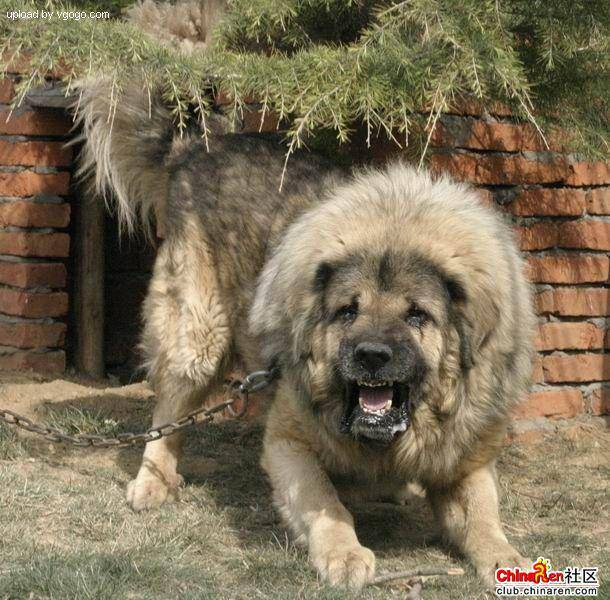

In [0]:
Image(imagepath[9000])

In [16]:
import numpy as np
from matplotlib.pyplot import imread
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
#finding unique labels in terms of numbers to process in ML model
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
# converting to a boolean array to make them unique number
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
#Turning boolean array to integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
# creating my own validation set
x = imagepath
y = boolean_labels


In [0]:
NUM_IMAGES = 1000 #@param {type:'slider',min:1000,max:10000,step:1000}

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
len(x_train),len(x_val)

(800, 200)

In [22]:
x_train[:2],y_train[:2]

(['drive/My Drive/Colab Notebooks/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Colab Notebooks/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fals

Preprecessing Images


In [23]:
#Convert image to numpy
image = imread(imagepath[42])
image.shape

(257, 350, 3)

In [24]:
##converting image to tensor
tf.constant(image)#this difference from numpy is that it can be processed my GPU so it will be fast

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [0]:
#Define image size
IMG_SIZE = 224

#Create a function for preprocessing image
def process_image(image_path,img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image,channels=3)
  #now normalising data
  image = tf.image.convert_image_dtype(image,tf.float32)
  #resize image
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

Turning our Data into batches ... but why?

Now see our GPU has a limit  that means if we try to process all the 10000 images at once then it may not fit in memory. So we will be doing 32 images at a time

In [0]:
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label

In [27]:
# get_image_label(x[34],y[34]) here label is not in tensor to converting it to tensor
get_image_label(x[34],tf.constant(y[34]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.09042301, 0.10218772, 0.12179556],
         [0.11473363, 0.12649834, 0.14610618],
         [0.09272581, 0.10449051, 0.12409835],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80392164, 0.77647066, 0.7137255 ]],
 
        [[0.08168886, 0.09737513, 0.10913984],
         [0.09317888, 0.10886515, 0.12062985],
         [0.1127224 , 0.12840867, 0.14017338],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80480576, 0.7773548 , 0.7146096 ]],
 
        [[0.1778584 , 0.19354467, 0.20530938],
         [0.10785257, 0.12353884, 0.13530354],
         [0.17694902, 0.1926353 , 0.2044    ],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.8078432 , 0.7803922 , 0.7176471 ]],
 
        ...,
 
        [[0.14830667, 0.16399294

In [0]:
#for batches
BATCH_SIZE = 32

def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print('Creating test data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print('Creating validation data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    #shuffling the pathnames and labels before mapping the processor function
    data = data.shuffle(buffer_size=len(x))

    #create(image,label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [29]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

Creating validation data batches


In [30]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
##Visualizing Data Batches
import matplotlib.pyplot as plt

def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    # plt.axis('off')

In [32]:
train_images,train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

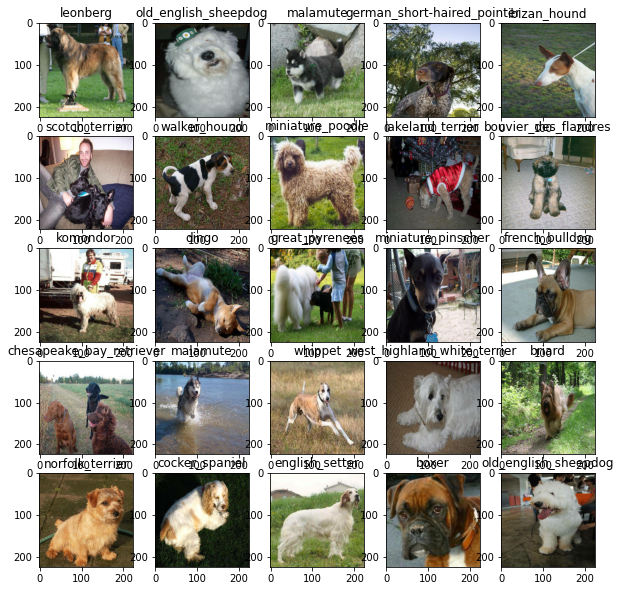

In [0]:
show_25_images(train_images,train_labels)

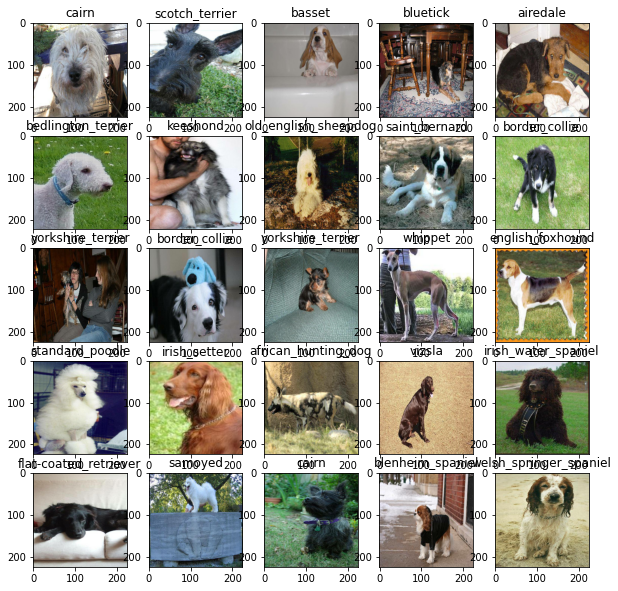

In [0]:
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [0]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE = len(unique_breeds)

# We are using transfer laerning here
#setup model URL from Tensorflow HUB
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'


In [0]:
#Using tensorflow keras: it is used to built high level deep learning API
def create_model(input_shape,output_shape,model_url):
  model = tf.keras.Sequential([hub.KerasLayer(model_url),#Layer 1(input layer)
                               tf.keras.layers.Dense(units=output_shape,
                                                     activation='softmax')#Layer 2(output layer)
                               ])
  # for binary classification sigmoid is used and for multiclass softmax is used
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  
  model.build(input_shape)
  return model


In [35]:
model = create_model(INPUT_SHAPE,OUTPUT_SHAPE,MODEL_URL)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
#Creating some callbacks here. They are helper function
#you can check the keras custom callbacks
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime
import os
def create_tensorboard_callback():
  logdir = os.path.join('drive/My Drive/Colab Notebooks/Dog Vision/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [0]:
#Finalling making Model
# we will be training on 1000 images initially
NUM_EPOCHS=100 #@param {type:'slider',min:10,max:100,step:10}

In [40]:
#Check for a gpu again just to confirm
print("GPU",'available' if tf.config.list_physical_devices('GPU') else 'not al')

GPU available


In [0]:
#Finally pakka creating model
def train_model():
  '''train a given model and returns the trained version'''
  model = create_model(INPUT_SHAPE,OUTPUT_SHAPE,MODEL_URL)

  #create new tensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq= 1,
            callbacks=[tensorboard,early_stopping])
  return model

In [42]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 438s 18s/step - loss: 4.6264 - accuracy: 0.0787 - val_loss: 3.6259 - val_accuracy: 0.1900
Epoch 2/100
25/25 [==============================] - 4s 173ms/step - loss: 1.6530 - accuracy: 0.6787 - val_loss: 2.2872 - val_accuracy: 0.4400
Epoch 3/100
25/25 [==============================] - 4s 174ms/step - loss: 0.5712 - accuracy: 0.9375 - val_loss: 1.7440 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 4s 172ms/step - loss: 0.2537 - accuracy: 0.9862 - val_loss: 1.5575 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 4s 170ms/step - loss: 0.1482 - accuracy: 0.9975 - val_loss: 1.4628 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 4s 170ms/step - loss: 0.1015 - accuracy: 0.9987 - val_loss: 1.4124 - val_accuracy: 0.6050
Epoch 7/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 1.3878 - val_accuracy: 0.6200

In [0]:
# Now let's check the TensorBoard logs to see what we did

In [44]:
%tensorboard --logdir drive/My\ Drive/Colab\ Notebooks/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [45]:
#Congo model is trained and now we have to make a prediction very very cool
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 118ms/step


array([[1.2410918e-03, 8.4612140e-05, 1.1584897e-03, ..., 4.0913592e-04,
        2.5921025e-05, 1.0634883e-03],
       [1.8956925e-03, 1.9690569e-04, 3.7671972e-02, ..., 1.0224305e-03,
        2.9160089e-03, 8.3520910e-04],
       [2.6209350e-06, 5.4105963e-05, 1.9304966e-06, ..., 6.4288768e-05,
        4.8904235e-06, 1.0314135e-04],
       ...,
       [1.9075478e-06, 3.9511418e-05, 3.4983819e-05, ..., 7.1623526e-06,
        2.3958481e-04, 2.7597916e-05],
       [8.9944815e-03, 6.7984613e-05, 7.8710473e-05, ..., 2.8220427e-05,
        2.7823558e-05, 3.7515105e-03],
       [1.6379594e-04, 2.1027336e-05, 3.4850303e-03, ..., 1.6839286e-02,
        1.4976268e-03, 3.2900047e-05]], dtype=float32)

In [46]:
predictions.shape#for each pic ie. 200 pics the probability of each breed ie 120 is given

(200, 120)

In [49]:
np.sum(predictions[0])

0.99999994

In [53]:
index=112
# print(predictions[index])
print(f'Max val (pro):{np.max(predictions[index])}')
ans=np.argmax(predictions[index])
print(f'Max index:{ans}')
print(f'Predicted breed:{unique_breeds[ans]}')

Max val (pro):0.87126225233078
Max index:36
Predicted breed:dhole


In [55]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[80])
pred_label

'pug'

In [56]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
def unbatchify(data):
  images=[]
  labels=[]

  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

In [72]:
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,true_label,image = prediction_probabilities[n],labels[n],images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  #let's change color
  if pred_label==true_label:
    color = 'green'
  else:
    color='red'
  plt.title("{} ,{:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                      true_label),
                              color=color)

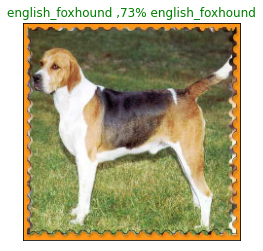

In [88]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=14)